<a href="https://colab.research.google.com/github/chakri970/Stock-Market-Prediction/blob/main/rfr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mine/all_stocks_5yr.csv")
# Convert the date column to ordinal values
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda date: date.toordinal())
df = df.drop('Name', axis=1)
# Split the data into features (X) and target (y)
X = df.drop("close", axis=1)
y = df["close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the Random Forest Regressor model to the training data
rfr = RandomForestRegressor(n_estimators=100, min_samples_leaf=2)
rfr.fit(X_train, y_train)


# Predict the stock prices on the testing set
y_pred = rfr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)


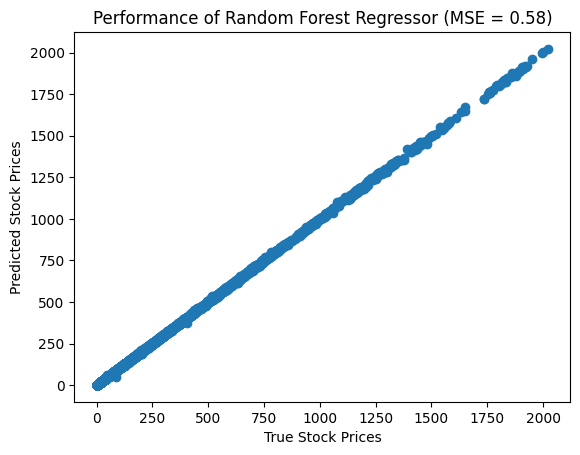

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.title("Performance of Random Forest Regressor (MSE = %.2f)" % mse)
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Predicted stock price for tomorrow: 34.529968005352494


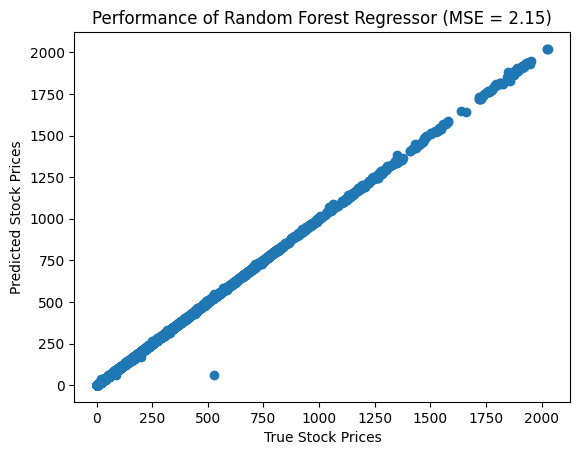

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import timedelta

# Load historical data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mine/all_stocks_5yr.csv")

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Get the last available date
last_date = df['date'].max()

# Create tomorrow's date
tomorrow_date = last_date + timedelta(days=1)

# Get the last row of data (i.e., today's data)
last_row = df.iloc[-1]

# Create tomorrow's data using the last known day's data
tomorrow_data = {
    'date': tomorrow_date,
    'open': last_row['close'],  # Assume open price = previous close
    'high': last_row['close'] * 1.01,  # Assume high is 1% higher
    'low': last_row['close'] * 0.99,   # Assume low is 1% lower
    'close': last_row['close'] * np.random.uniform(0.99, 1.01),  # Slight random move
    'volume': last_row['volume'],  # Assume same volume
    'Name': last_row['Name']  # Keep the same 'Name' column value
}

# Add tomorrow's data to the DataFrame
tomorrow_df = pd.DataFrame([tomorrow_data])
df = pd.concat([df, tomorrow_df], ignore_index=True)

# Add a daily return feature to the data (based on 'close' column)
df['Daily_Return'] = df['close'].pct_change()

# Drop 'date' and 'Name' columns as they should not be part of the model training
X = df.drop(["close", "date", "Name"], axis=1)  # Drop 'close', 'date', and 'Name' columns from features
y = df["close"]  # Set 'close' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SimpleImputer to fill in any missing values
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Define the hyperparameters for Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV to find the best hyperparameters for the model
rfr = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# Fit the best model to the training data
rfr = random_search.best_estimator_
rfr.fit(X_train, y_train)

# Predict the stock prices for tomorrow
tomorrow_features = X_test[-1, :].reshape(1, -1)
tomorrow_price = rfr.predict(tomorrow_features)
print("Predicted stock price for tomorrow:", tomorrow_price[0])

# Predict the stock prices on the testing set
y_pred = rfr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Plot the true stock prices versus the predicted stock prices
plt.scatter(y_test, y_pred)
plt.xlabel("True Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.title("Performance of Random Forest Regressor (MSE = %.2f)" % mse)
plt.show()


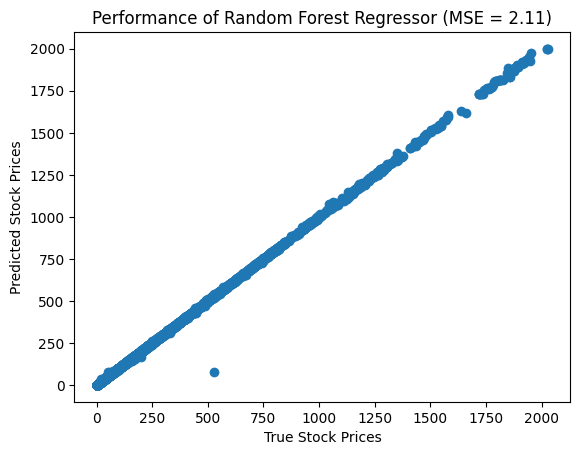

In [ ]:
# Create a Random Forest Regressor with regularization
rfr = RandomForestRegressor(n_estimators=100, min_samples_leaf=10)
rfr.fit(X_train, y_train)

# Predict the stock prices on the testing set
y_pred = rfr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Plot the true stock prices versus the predicted stock prices
plt.scatter(y_test, y_pred)
plt.xlabel("True Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.title("Performance of Random Forest Regressor (MSE = %.2f)" % mse)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor



In [ ]:
# Use GridSearchCV to find the best hyperparameters for the model
rfr = RandomForestRegressor()

grid_search = GridSearchCV(
    rfr,
    param_grid={'n_estimators': [50, 100], 'min_samples_leaf': [1, 2]},
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

rfr = grid_search.best_estimator_
rfr.fit(X_train, y_train)


Best hyperparameters: {'min_samples_leaf': 1, 'n_estimators': 100}


RandomForestRegressor()

Average MSE:  2.907911625019386


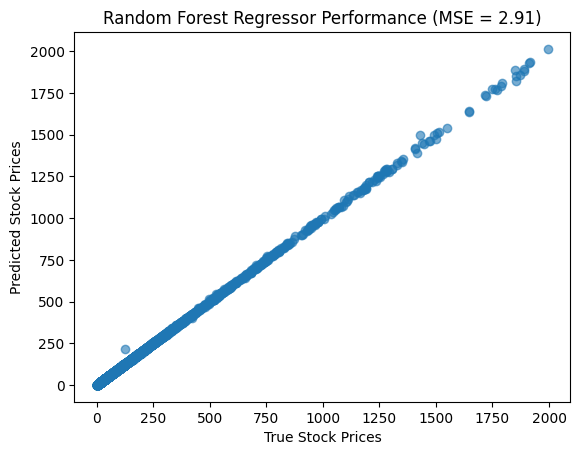

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Load and sample data for faster execution without losing integrity
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mine/all_stocks_5yr.csv")
df = df.sample(frac=0.2, random_state=42)  # Use 20% of data

# Convert 'date' column to ordinal
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda d: d.toordinal())

# Prepare features and target
X = df.drop(["close", "Name"], axis=1)
y = df["close"]

# K-Fold Cross-validation with fewer splits for speed
kf = KFold(n_splits=3, shuffle=True, random_state=42)
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Parallelize the training using all cores
    rfr = RandomForestRegressor(n_estimators=100, min_samples_leaf=1, n_jobs=-1, random_state=42)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Average MSE across folds
average_mse = sum(mse_scores) / len(mse_scores)
print("Average MSE: ", average_mse)

# Plot predictions from last fold
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True Stock Prices")
plt.ylabel("Predicted Stock Prices")
plt.title("Random Forest Regressor Performance (MSE = %.2f)" % average_mse)
plt.show()
